In [1]:
#### more simple analysis, no CV, trial by trial

In [2]:
from linares_plot import *
import sys, os
path_tools = 'C:\\Users\\David\\Documents\\GitHub\\encoding\\scripts\\wm_representation\\functions\\IEM\\tools'
sys.path.insert(1, path_tools)
from timecourse import *
import statsmodels.formula.api as smf
from scipy import stats

***decode angle in each TR***  
trial by trial

In [35]:
path = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_trials.xlsx'
df=pd.read_excel(path)
df.head()

,Unnamed: 0,index,type,delay1,delay2,T,NT1,NT2,Dist,Dist_NT1,...,angle_16.345,angle_18.68,angle_21.015,angle_23.35,angle_25.685,angle_28.02,angle_30.355,angle_32.69,angle_35.025,brain_region
0,0,0,1,0.2,11.8,142,241,321,126.0,214.7,...,353.306880,301.334949,53.138939,146.178575,172.671739,334.001720,342.383377,335.097734,180.318258,visual
1,1,1,3,7.0,12.0,204,51,114,311.0,65.1,...,239.733096,254.710918,277.986737,15.277336,22.813718,26.142667,29.932089,195.239276,190.548065,visual
2,2,2,3,7.0,5.0,63,200,139,305.0,216.7,...,358.545119,340.488780,342.883275,330.619499,159.648407,157.173739,168.093078,163.740625,328.732464,visual
3,3,3,3,7.0,12.0,296,223,156,53.0,204.2,...,41.006448,233.746383,50.056368,22.161452,12.949112,338.683813,209.808055,201.980750,187.059487,visual
4,4,4,3,0.2,11.8,312,42,232,113.0,29.4,...,172.449342,133.071008,3.575792,311.213662,356.300365,6.816928,337.767719,187.996226,173.282839,visual


In [36]:
print(len(df))
print(df.subject.unique())
print(df.brain_region.unique())
print(df.Condition.unique())

7952
['d001' 'n001' 'b001' 'r001' 's001' 'l001']
['visual' 'ips' 'pfc' 'broca']
['1_0.2' '2_7' '1_7' '2_0.2']


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

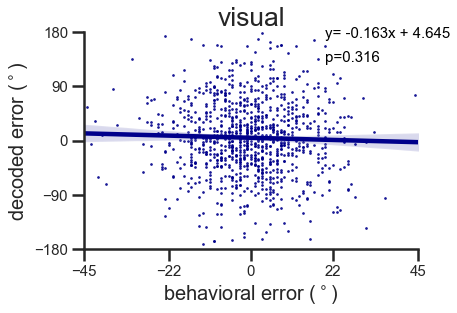

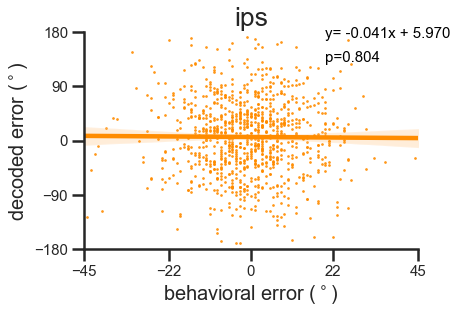

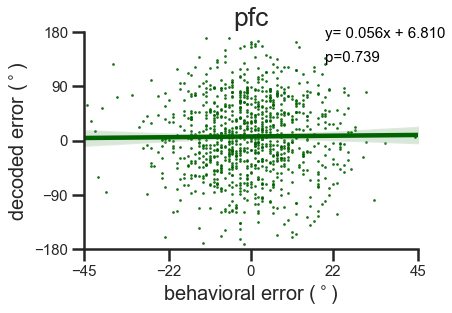

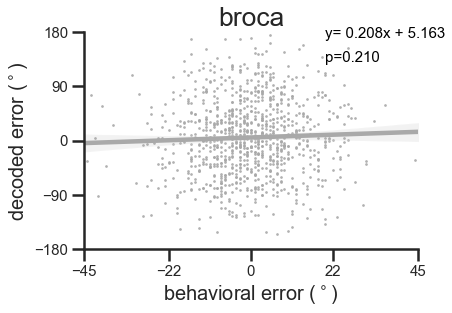

In [40]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-180, 180)
    plt.yticks([-180, -90, 0, 90, 180], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 170, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 130, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


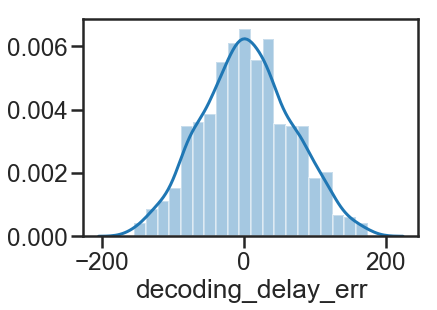

In [38]:
sns.distplot(df_['decoding_delay_err'])

***decode angle in each TR***  
***make the reconstruction positive***  
trial by trial

In [49]:
path = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_trials_pos.xlsx'
df=pd.read_excel(path)
df.head()

,Unnamed: 0,index,type,delay1,delay2,T,NT1,NT2,Dist,Dist_NT1,...,angle_16.345,angle_18.68,angle_21.015,angle_23.35,angle_25.685,angle_28.02,angle_30.355,angle_32.69,angle_35.025,brain_region
0,0,0,1,0.2,11.8,142,241,321,126.0,214.7,...,165.016695,185.989337,169.648930,165.969570,174.572011,200.025291,210.676536,191.553862,179.992426,visual
1,1,1,3,7.0,12.0,204,51,114,311.0,65.1,...,198.751891,206.194939,206.697039,145.237059,156.414844,166.377877,174.995157,190.681028,189.919690,visual
2,2,2,3,7.0,5.0,63,200,139,305.0,216.7,...,154.392591,156.700290,157.582733,171.276048,166.498625,166.093747,172.354632,172.334289,176.667186,visual
3,3,3,3,7.0,12.0,296,223,156,53.0,204.2,...,199.391291,203.365027,198.739539,143.370512,205.183617,196.686808,196.513935,199.823967,189.813245,visual
4,4,4,3,0.2,11.8,312,42,232,113.0,29.4,...,175.798800,176.034384,205.098244,196.601793,202.865360,169.021167,188.368410,186.437949,178.881317,visual


In [50]:
print(len(df))
print(df.subject.unique())
print(df.brain_region.unique())
print(df.Condition.unique())

7952
['d001' 'n001' 'b001' 'r001' 's001' 'l001']
['visual' 'ips' 'pfc' 'broca']
['1_0.2' '2_7' '1_7' '2_0.2']


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

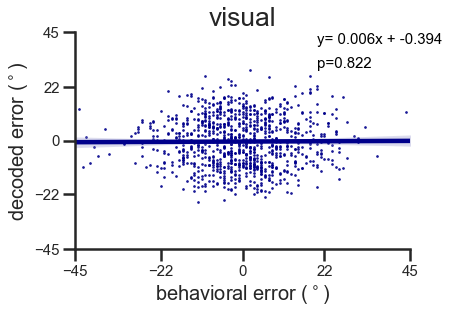

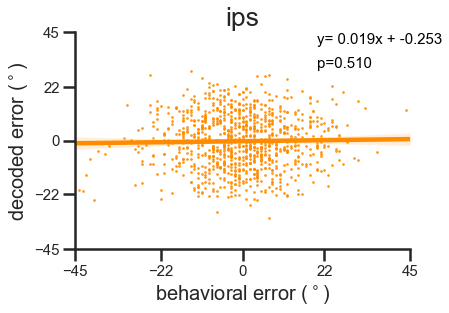

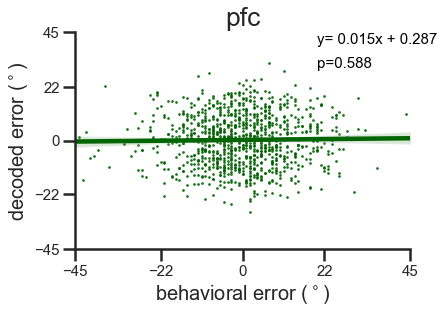

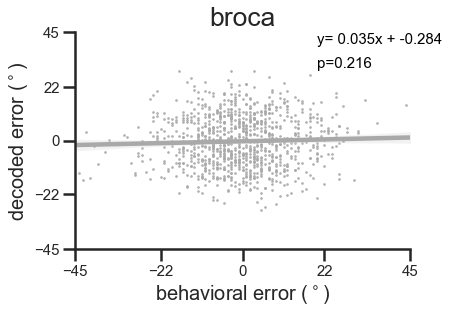

In [51]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


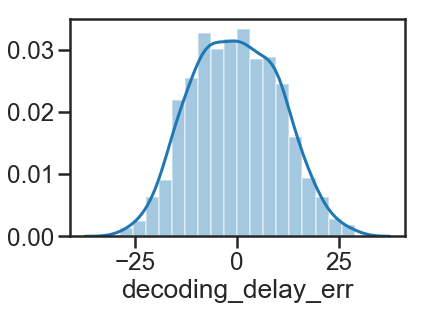

In [52]:
sns.distplot(df_['decoding_delay_err'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


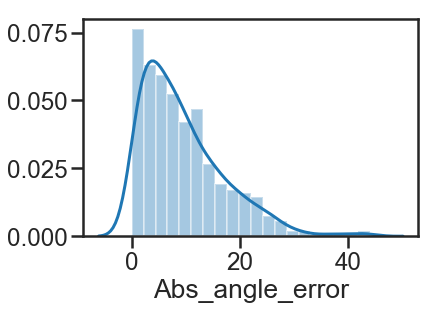

In [53]:
sns.distplot(df_['Abs_angle_error'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

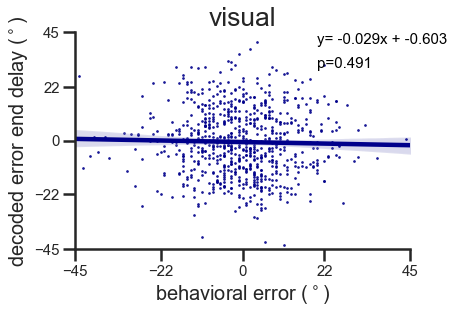

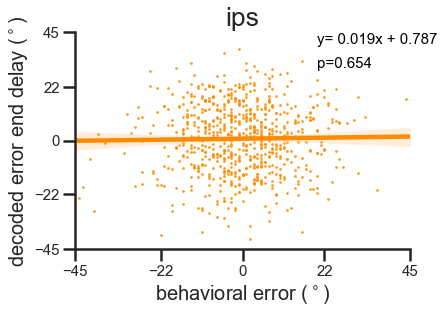

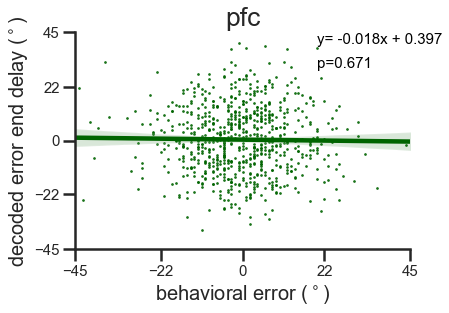

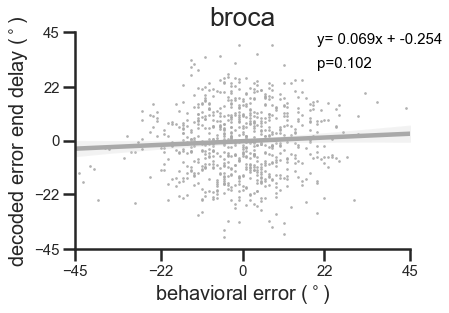

In [98]:
### last 2 TRs of the delay

colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_a= df.loc[(df['Condition']!='2_7') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_a['decoding_delay'] = df_a[['angle_16.345', 'angle_18.68']].mean(axis=1)
    df_a['decoding_delay_err'] = 180 - df_a['decoding_delay']
    df_a = df_a[~np.isnan(df_a['decoding_delay'])]
    ##
    df_b= df.loc[(df['Condition']=='2_7') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_b['decoding_delay'] = df_a[['angle_23.35', 'angle_25.685']].mean(axis=1) 
    df_b['decoding_delay_err'] = 180 - df_b['decoding_delay']
    df_b = df_b[~np.isnan(df_b['decoding_delay'])]
    df_ = pd.concat([df_a, df_b])
    ##
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error end delay ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())





C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

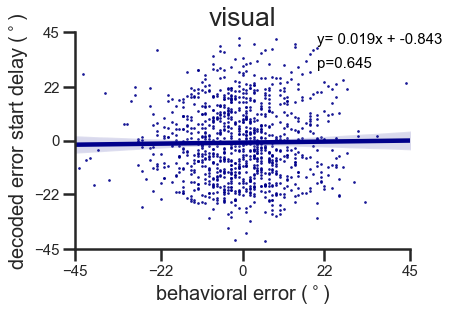

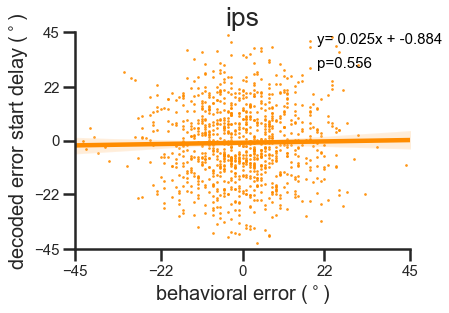

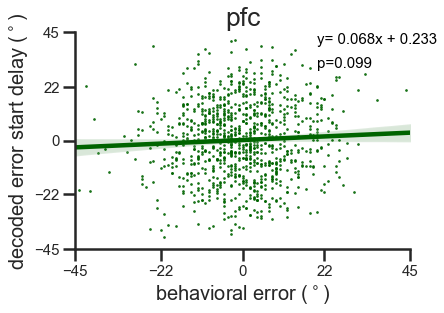

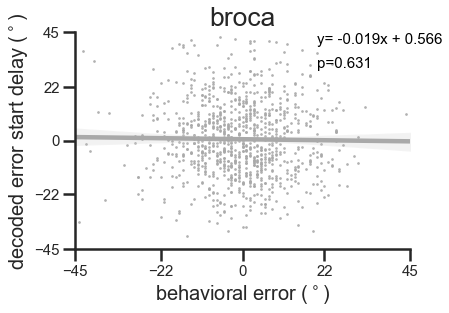

In [103]:
### first TR of the delay
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_a= df.loc[(df['Condition']!='2_7') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_a['decoding_delay'] = df_a['angle_9.34']
    df_a['decoding_delay_err'] = 180 - df_a['decoding_delay']
    df_a = df_a[~np.isnan(df_a['decoding_delay'])]
    ##
    df_b= df.loc[(df['Condition']=='2_7') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_b['decoding_delay'] = df_b['angle_16.345']
    df_b['decoding_delay_err'] = 180 - df_b['decoding_delay']
    df_b = df_b[~np.isnan(df_b['decoding_delay'])]
    df_ = pd.concat([df_a, df_b])
    ##
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error start delay ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())


In [ ]:
###by conditions

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

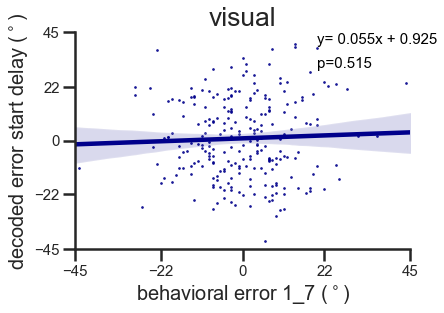

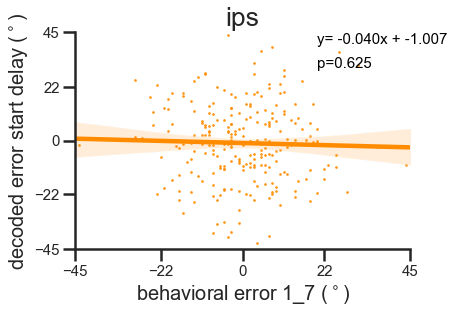

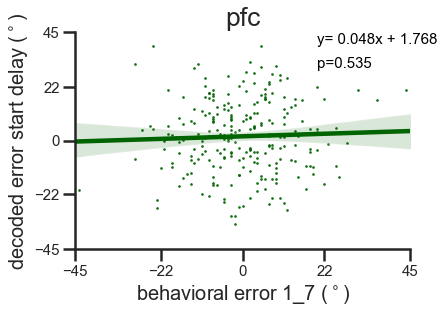

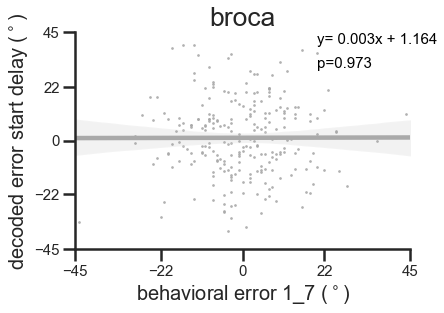

In [104]:
### first TR of the delay condidion alonde
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['Condition']=='1_7') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_['decoding_delay'] = df_['angle_9.34']
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    df_ = df_[~np.isnan(df_['decoding_delay'])]
    ##
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error 1_7 ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error start delay ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

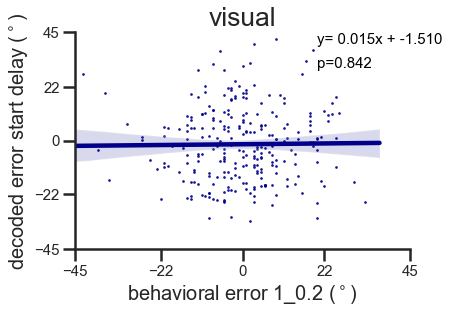

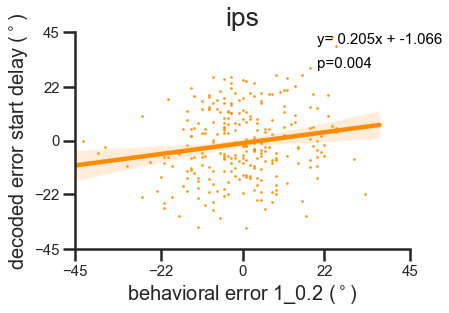

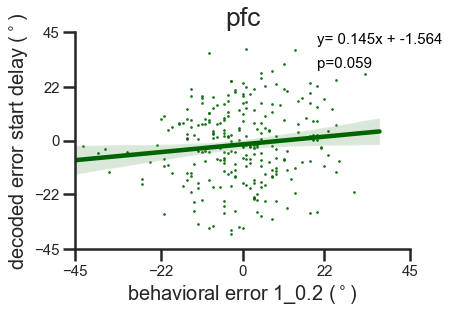

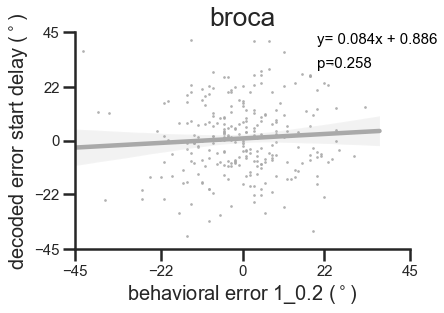

In [107]:
### first TR of the delay condidion alonde
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['Condition']=='1_0.2') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_['decoding_delay'] = df_['angle_9.34']
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    df_ = df_[~np.isnan(df_['decoding_delay'])]
    ##
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error 1_0.2 ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error start delay ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

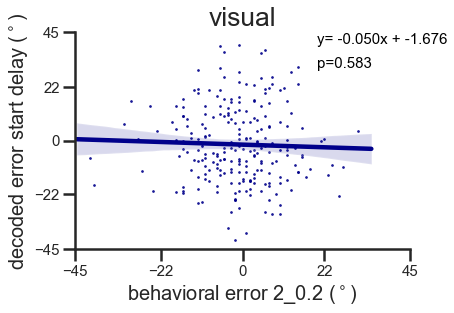

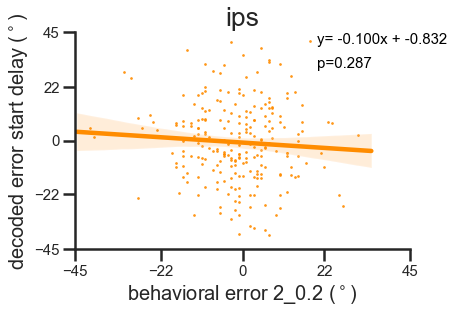

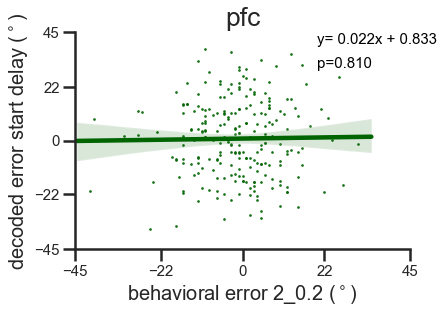

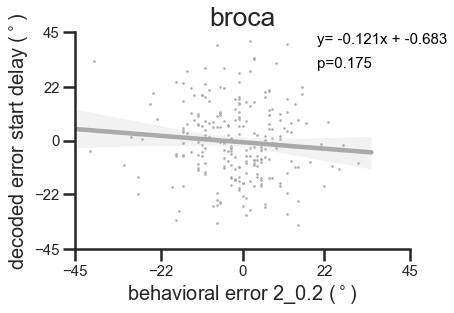

In [108]:
### first TR of the delay condidion alonde
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['Condition']=='2_0.2') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_['decoding_delay'] = df_['angle_9.34']
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    df_ = df_[~np.isnan(df_['decoding_delay'])]
    ##
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error 2_0.2 ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error start delay ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

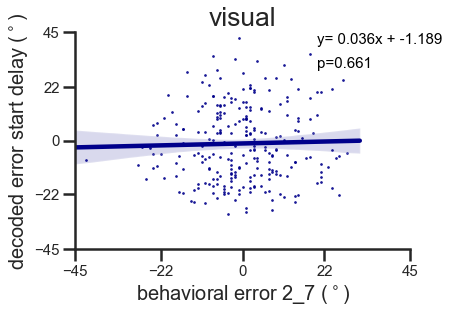

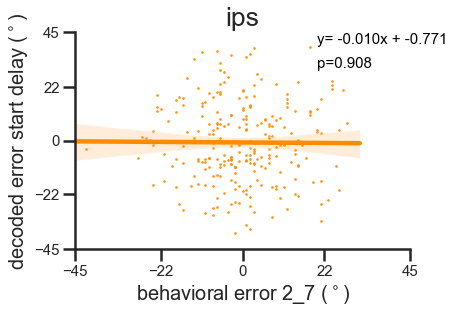

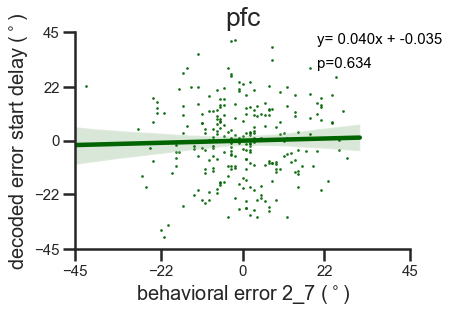

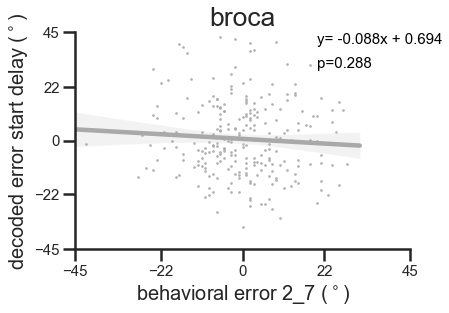

In [109]:
### first TR of the delay condidion alonde
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()     
    df_= df.loc[(df['Condition']=='2_7') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]  ### (df['Condition']=='1_0.2')
    df_['decoding_delay'] = df_['angle_16.345']
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    df_ = df_[~np.isnan(df_['decoding_delay'])]
    ##
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45],fontsize=15)
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45], fontsize=15)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    plt.text(20, 40, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    plt.text(20, 30, "p={0:.3f}".format(p_value), color='k', fontsize=15)
    plt.xlabel('behavioral error 2_7 ($^\circ$)', fontsize=20)
    plt.ylabel('decoded error start delay ($^\circ$)', fontsize=20)
    plt.show() 
    print('')
    ###
    ###
    #res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    #print(res_m.summary())

In [ ]:
##Look at the signal decoding

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'order 1, TDOA 0.2, early delay')

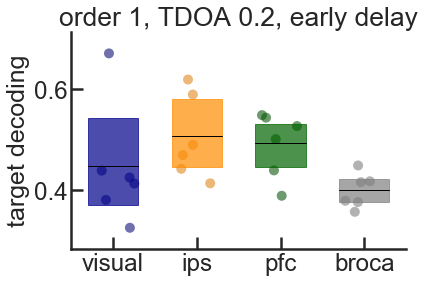

In [114]:
df_1_02 = df.loc[(df['Condition']=='1_0.2')]
df_1_02['decoding_delay'] = df_1_02[['signal_9.34', 'signal_11.675']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1, TDOA 0.2, early delay')





C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'order 2, TDOA 0.2, early delay')

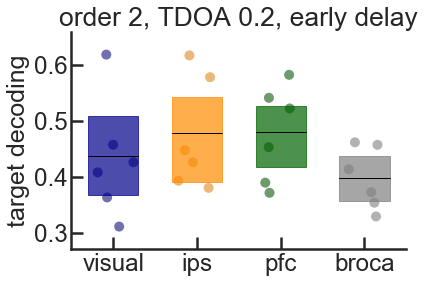

In [115]:
df_2_02 = df.loc[(df['Condition']=='2_0.2')]
df_2_02['decoding_delay'] = df_2_02[['signal_9.34', 'signal_11.675']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2, TDOA 0.2, early delay')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'order 1, TDOA 7, early delay')

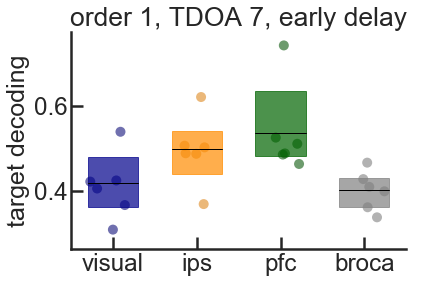

In [116]:
df_1_7 = df.loc[(df['Condition']=='1_7')]
df_1_7['decoding_delay'] = df_1_7[['signal_9.34', 'signal_11.675']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 1, TDOA 7, early delay')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'order 2, TDOA 7, early delay')

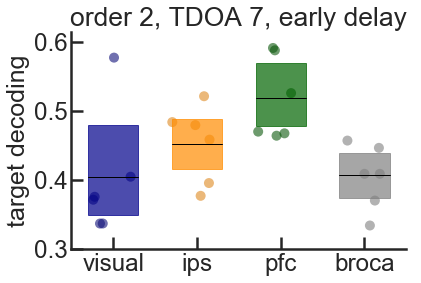

In [118]:
df_2_7 = df.loc[(df['Condition']=='2_7')]
df_2_7['decoding_delay'] = df_2_7[['signal_16.345', 'signal_18.68']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2, TDOA 7, early delay')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'order 2, TDOA 7, pre-target')

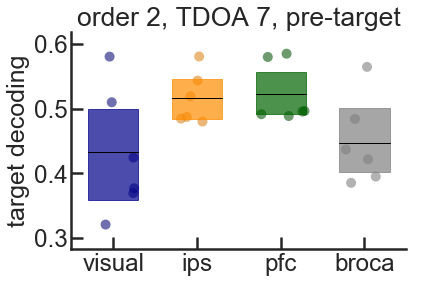

In [120]:
df_2_7 = df.loc[(df['Condition']=='2_7')]
df_2_7['decoding_delay'] = df_2_7[['signal_9.34', 'signal_11.675']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('order 2, TDOA 7, pre-target')

In [ ]:
##

In [2]:
path = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_trials.xlsx'
path = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_trials_pos.xlsx'
df=pd.read_excel(path)
df.head()

,Unnamed: 0,index,type,delay1,delay2,T,NT1,NT2,Dist,Dist_NT1,...,angle_16.345,angle_18.68,angle_21.015,angle_23.35,angle_25.685,angle_28.02,angle_30.355,angle_32.69,angle_35.025,brain_region
0,0,0,1,0.2,11.8,142,241,321,126.0,214.7,...,165.016695,185.989337,169.648930,165.969570,174.572011,200.025291,210.676536,191.553862,179.992426,visual
1,1,1,3,7.0,12.0,204,51,114,311.0,65.1,...,198.751891,206.194939,206.697039,145.237059,156.414844,166.377877,174.995157,190.681028,189.919690,visual
2,2,2,3,7.0,5.0,63,200,139,305.0,216.7,...,154.392591,156.700290,157.582733,171.276048,166.498625,166.093747,172.354632,172.334289,176.667186,visual
3,3,3,3,7.0,12.0,296,223,156,53.0,204.2,...,199.391291,203.365027,198.739539,143.370512,205.183617,196.686808,196.513935,199.823967,189.813245,visual
4,4,4,3,0.2,11.8,312,42,232,113.0,29.4,...,175.798800,176.034384,205.098244,196.601793,202.865360,169.021167,188.368410,186.437949,178.881317,visual


In [3]:
len(df)

7952

In [4]:
print(df.subject.unique())
print(df.brain_region.unique())
print(df.Condition.unique())

['d001' 'n001' 'b001' 'r001' 's001' 'l001']
['visual' 'ips' 'pfc' 'broca']
['1_0.2' '2_7' '1_7' '2_0.2']


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

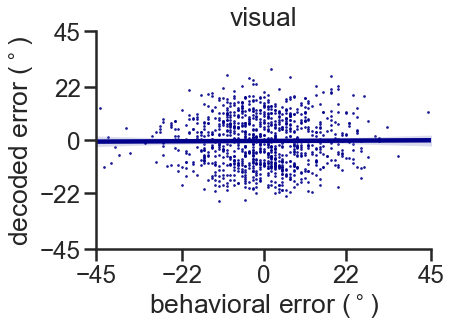

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              107.0520          
Min. group size:  141     Likelihood:         -3742.5058        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.393      0.334   -1.177   0.239   -1.048    0.261
A_err          0.006      0.027    0.224   0.822   -0.047    0.059
Group Var      0.012      0.077                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


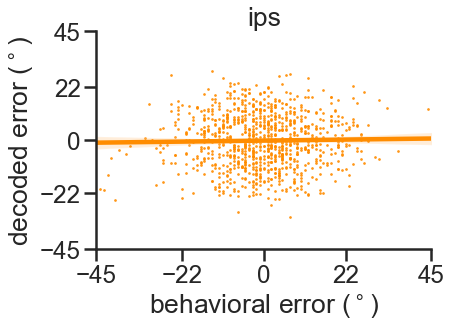

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              122.4153          
Min. group size:  141     Likelihood:         -3809.1159        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.253      0.352   -0.719   0.472   -0.943    0.437
A_err          0.019      0.029    0.648   0.517   -0.039    0.077
Group Var      0.001      0.049                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


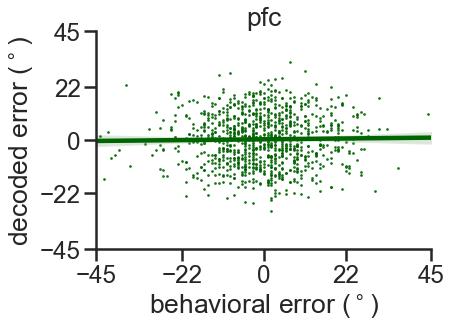

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              114.8697          
Min. group size:  141     Likelihood:         -3777.5231        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       0.287      0.342   0.837   0.403   -0.384    0.958
A_err           0.015      0.028   0.539   0.590   -0.040    0.071
Group Var       0.009      0.065                                  



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


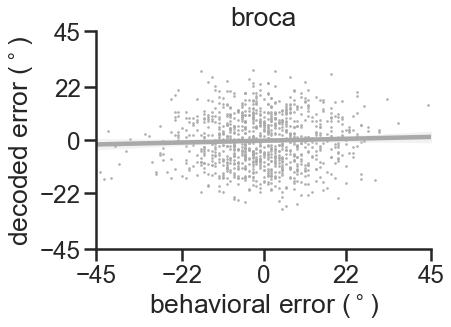

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              114.8431          
Min. group size:  141     Likelihood:         -3777.3762        
Max. group size:  186     Converged:          Yes               
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.284      0.341   -0.833   0.405   -0.953    0.384
A_err          0.035      0.029    1.210   0.226   -0.022    0.091
Group Var      0.000      0.051                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [10]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()
    #df_1_02 = df.loc[(df['Condition']=='1_0.2') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG)]
    df_= df.loc[(df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]
    df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45])
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45])
    #slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    #plt.text(20, 60, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    #plt.text(20, 30, "p one sided={0:.3f}".format(p_value/2), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)')
    plt.ylabel('decoded error ($^\circ$)')
    plt.show() 
    ###
    ###
    res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    print(res_m.summary())
    

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

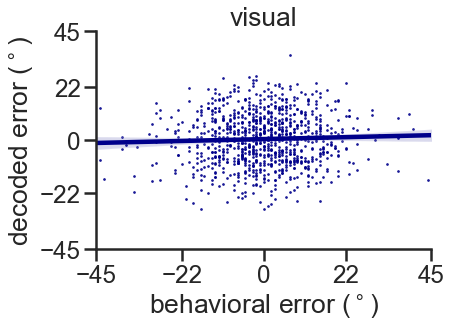

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 962     Method:             REML              
No. Groups:       6       Scale:              115.0923          
Min. group size:  134     Likelihood:         -3662.1514        
Max. group size:  184     Converged:          No                
Mean group size:  160.3                                         
------------------------------------------------------------------
               Coef.    Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       0.424      4.394   0.097   0.923   -8.187    9.036
A_err           0.038      0.030   1.279   0.201   -0.020    0.096
Group Var     115.092                                             



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


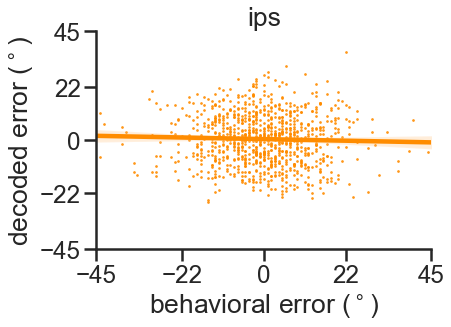

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 962     Method:             REML              
No. Groups:       6       Scale:              111.8633          
Min. group size:  134     Likelihood:         -3648.4922        
Max. group size:  184     Converged:          No                
Mean group size:  160.3                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept      0.391      4.331    0.090   0.928   -8.098    8.881
A_err         -0.029      0.029   -0.979   0.328   -0.086    0.029
Group Var    111.863                                              



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


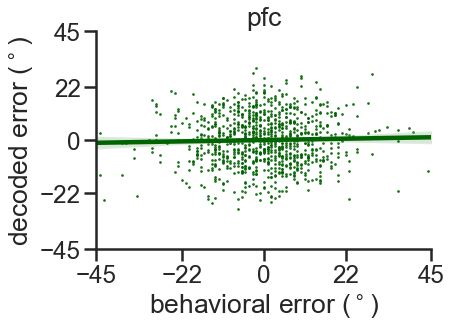

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 962     Method:             REML              
No. Groups:       6       Scale:              109.1474          
Min. group size:  134     Likelihood:         -3636.6944        
Max. group size:  184     Converged:          No                
Mean group size:  160.3                                         
------------------------------------------------------------------
               Coef.    Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       0.018      4.279   0.004   0.997   -8.368    8.404
A_err           0.032      0.029   1.126   0.260   -0.024    0.089
Group Var     109.147                                             



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


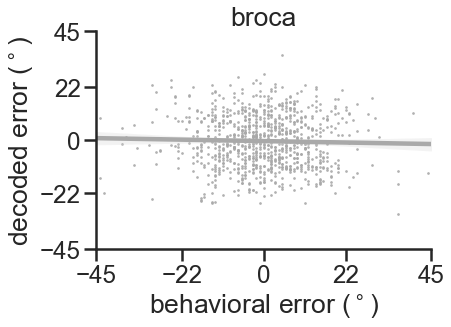

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 962     Method:             REML              
No. Groups:       6       Scale:              115.7969          
Min. group size:  134     Likelihood:         -3665.0810        
Max. group size:  184     Converged:          No                
Mean group size:  160.3                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.431      4.407   -0.098   0.922   -9.069    8.206
A_err         -0.025      0.030   -0.832   0.405   -0.083    0.033
Group Var    115.797                                              



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [11]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()
    #df_1_02 = df.loc[(df['Condition']=='1_0.2') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG)]
    df_= df.loc[(df['T_alone'] != df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]
    df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45])
    plt.ylim(-45, 45)
    plt.yticks([-45, -22, 0, 22, 45])
    #slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    #plt.text(20, 60, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    #plt.text(20, 30, "p one sided={0:.3f}".format(p_value/2), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)')
    plt.ylabel('decoded error ($^\circ$)')
    plt.show() 
    ###
    ###
    res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

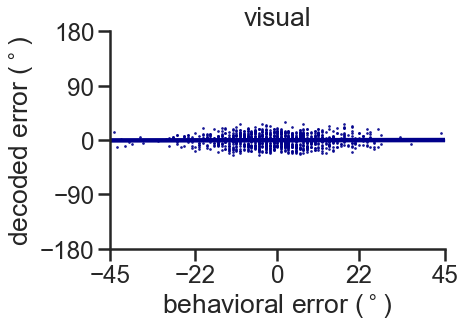

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              107.0520          
Min. group size:  141     Likelihood:         -3742.5058        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.393      0.334   -1.177   0.239   -1.048    0.261
A_err          0.006      0.027    0.224   0.822   -0.047    0.059
Group Var      0.012      0.077                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


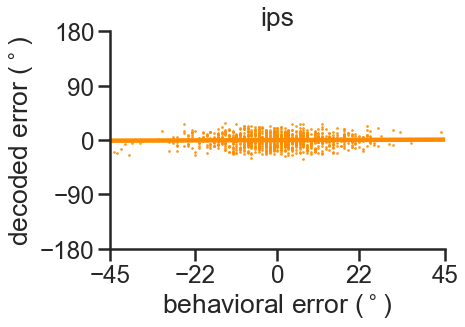

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              122.4153          
Min. group size:  141     Likelihood:         -3809.1159        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.253      0.352   -0.719   0.472   -0.943    0.437
A_err          0.019      0.029    0.648   0.517   -0.039    0.077
Group Var      0.001      0.049                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


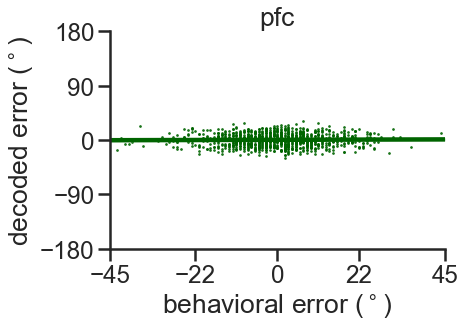

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              114.8697          
Min. group size:  141     Likelihood:         -3777.5231        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       0.287      0.342   0.837   0.403   -0.384    0.958
A_err           0.015      0.028   0.539   0.590   -0.040    0.071
Group Var       0.009      0.065                                  



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


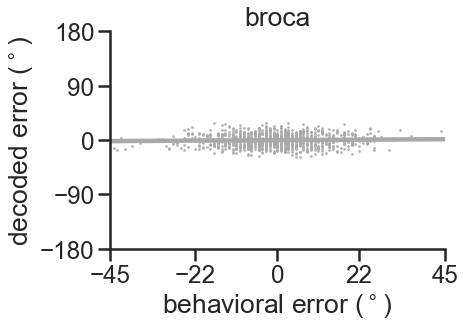

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              114.8431          
Min. group size:  141     Likelihood:         -3777.3762        
Max. group size:  186     Converged:          Yes               
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.284      0.341   -0.833   0.405   -0.953    0.384
A_err          0.035      0.029    1.210   0.226   -0.022    0.091
Group Var      0.000      0.051                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [7]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()
    #df_1_02 = df.loc[(df['Condition']=='1_0.2') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG)]
    df_= df.loc[(df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]
    df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45])
    plt.ylim(-180, 180)
    plt.yticks([-180,-90,0,90,180])
    #slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    #plt.text(20, 60, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    #plt.text(20, 30, "p one sided={0:.3f}".format(p_value/2), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)')
    plt.ylabel('decoded error ($^\circ$)')
    plt.show() 
    ###
    ###
    res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    print(res_m.summary())
    

In [ ]:
## By condition

In [13]:
df.columns

Index(['Unnamed: 0', 'index', 'type', 'delay1', 'delay2', 'T', 'NT1', 'NT2',
       'Dist', 'Dist_NT1', 'Dist_NT2', 'distance_T_dist', 'cue', 'order',
       'orient', 'horiz_vertical', 'A_R', 'A_err', 'Abs_angle_error',
       'Error_interference', 'A_DC', 'A_DC_dist', 'Q_DC', 'A_DF', 'A_DF_dist',
       'Q_DF', 'A_DVF', 'Q_DVF', 'A_DVF_dist', 'Q_DVF_dist',
       'presentation_att_cue_time', 'presentation_target_time',
       'presentation_dist_time', 'presentation_probe_time', 'R_T',
       'trial_time', 'disp_time', 'T_alone', 'dist_alone', 'T_close',
       'dist_close', 'subject', 'session', 'run', 'session_run', 'Condition',
       'signal_0.0', 'signal_2.335', 'signal_4.67', 'signal_7.005',
       'signal_9.34', 'signal_11.675', 'signal_14.01', 'signal_16.345',
       'signal_18.68', 'signal_21.015', 'signal_23.35', 'signal_25.685',
       'signal_28.02', 'signal_30.355', 'signal_32.69', 'signal_35.025',
       'angle_0.0', 'angle_2.335', 'angle_4.67', 'angle_7.005', 'angle_9.3

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'')

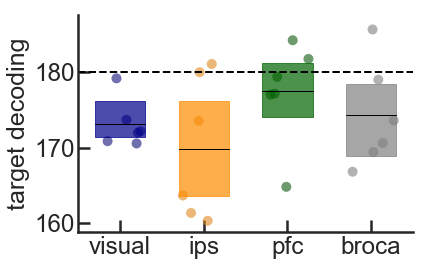

In [6]:
df_1_02 = df.loc[(df['Condition']=='1_0.2')]
df_1_02['decoding_delay'] = df_1_02[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [180,180], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5,1,'')

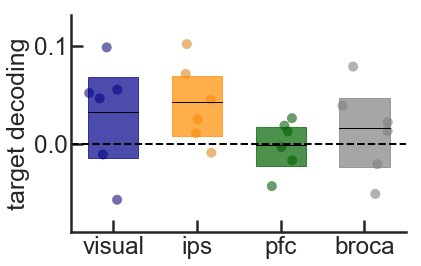

In [17]:
df_1_02 = df.loc[(df['Condition']=='1_0.2')]
df_1_02['decoding_delay'] = df_1_02[['signal_11.675', 'signal_14.01', 'signal_16.345', 'signal_18.68']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'')

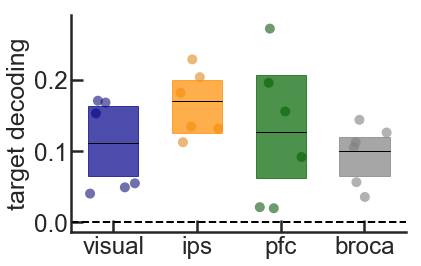

In [18]:
df_1_7 = df.loc[(df['Condition']=='1_7')]
df_1_7['decoding_delay'] = df_1_7[['signal_11.675', 'signal_14.01']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'')

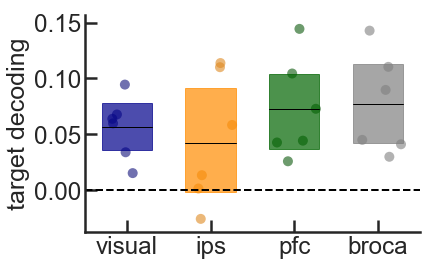

In [24]:
df_2_7 = df.loc[(df['Condition']=='2_7')]
df_2_7['decoding_delay'] = df_2_7[['signal_11.675', 'signal_14.01']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')